# MATH 2071 Lab 5 - Norms and errors

Matthew Ragoza

2022-01-24

In [79]:
%matplotlib inline
import sys
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

sys.path.append('code')
import gallery

# Exercise 1 - Vector norms

- The purpose of this exercise is to learn how to define vectors and compute vector norms using `numpy`, as well as compare their output to the mathematical definitions.
- I defined the three vectors $x_1, x_2, x_3$ using numpy arrays.
- I computed the $L_1, L_2, L_\infty$ norms of each vector and printed them below. The $L_1$ norm is the total absolute value of the elements in each vector. The $L_2$ norm is the Euclidean length of each vector. The $L_\infty$ norm is the maximum absolute element in the vectors.

In [115]:
x1 = np.array([4, 6, 7])
x2 = np.array([7, 5, 6])
x3 = np.array([1, 5, 4])

for i, x in enumerate([x1, x2, x3]):
    for p in [1, 2, np.inf]:
        print(f'The L{p} norm of x{i+1} is {norm(x, p):.4f}')

The L1 norm of x1 is 17.0000
The L2 norm of x1 is 10.0499
The Linf norm of x1 is 7.0000
The L1 norm of x2 is 18.0000
The L2 norm of x2 is 10.4881
The Linf norm of x2 is 7.0000
The L1 norm of x3 is 10.0000
The L2 norm of x3 is 6.4807
The Linf norm of x3 is 5.0000


# Exercise 2 - Matrix norms

The norm of a linear operator can be defined as:

$$
    \|A\| = \max_{x\neq0} \frac{\|Ax\|}{\|x\|}
$$

In order for a matrix norm to be consistent with this definition, the following must be true:

$$
    \|Ax\| \leq \|A\| \|x\|
$$

Or equivalently:

$$
    \frac{\|Ax\|}{\|A\| \|x\|} \leq 1
$$

- The goal of this section is to define matrices and compute matrix norms in `numpy`, and to check which matrix norms are compatible with different vector norms. First, I defined the matrices $A_1$ and $A_2$ below.
- Next, I iterated over four different matrix norms, three different vector norms, both matrices, and each of the vectors I defined in the previous exercise. For each combination, I computed the norm ratio $r = \frac{\|Ax\|}{\|A\|\|x\|}$ to check if any of the matrix and vector norms were incompatible with each other. I displayed the results in a table below.

In [116]:
# check compatible matrix and vector norms
#   where ||Ax|| <= ||A|| ||x||
#   i.e. ||Ax|| / (||A|| ||x||) <= 1

A1 = np.array([
    [38, 37, 80],
    [53, 49, 49],
    [23, 85, 46]
])
A2 = np.array([
    [77, 89, 78],
    [ 6, 34, 10],
    [65, 36, 26]
])

data = []
for p in [1, 2, np.inf, 'fro']:
    for q in [1, 2, np.inf]:
        for i_A, A in enumerate([A1, A2]):
            for i_x, x in enumerate([x1, x2, x3]):
                r = norm(A@x, q) / (norm(A, p) * norm(x, q))
                data.append((f'L{p}', f'L{q}', i_A+1, i_x+1, r))

df = pd.DataFrame(data, columns=['matrix norm', 'vector norm', 'A', 'x', 'r'])
df['compatible'] = df.r <= 1.0
df.groupby(['matrix norm', 'vector norm'])[['compatible']].all()

compatible
matrix norm vector norm            
L1          L1                 True
            L2                False
            Linf              False
L2          L1                False
            L2                 True
            Linf              False
Lfro        L1                False
            L2                 True
            Linf              False
Linf        L1                False
            L2                False
            Linf               True

In this table, any combination of matrix and vector norms for which at least one input matrix-vector violated the inequality above was marked as incompatible. Otherwise, the combination was marked compatible (though this isn't necessarily true in general). We can see that for each $p$ in $[1, 2, \infty]$, the matrix and vectors versions of the $L_p$ norm are compatible. In addition, the Frobenius matrix norm is compatible with the $L_2$ vector norm, as was expected. None of the other combinations were compatible.

# Exercise 3 - Spectral radius

- The purpose of this exercise is to investigate the properties of the spectral radius. In particular, we will see why it is incompatible with the $L_2$ vector norm.

- I used the provided code to generate a Jordan block matrix $A$ and a vector of ones $x$.

In [122]:
A = gallery.jordan_block(7, 0.5)
x = np.ones(7)
print(A)
print(x)

[[0.5 1.  0.  0.  0.  0.  0. ]
 [0.  0.5 1.  0.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.  0.  0. ]
 [0.  0.  0.  0.5 1.  0.  0. ]
 [0.  0.  0.  0.  0.5 1.  0. ]
 [0.  0.  0.  0.  0.  0.5 1. ]
 [0.  0.  0.  0.  0.  0.  0.5]]
[1. 1. 1. 1. 1. 1. 1.]


- Then, I computed the eigenvalues $w$ and eigenvectors $v$ of $A$.
- I determined the spectral radius $\rho(A)$, that is, the size of the largest eigenvalue of $A$. The resulting value is $\rho(A) = 0.5$.

In [123]:
w, v = np.linalg.eig(A)
rho = w.max()
rho

0.5

- I computed and displayed the norm ratio $r = \frac{\|Ax\|}{\|A\|\|x\|}$ using both the $L_2$ matrix norm and the spectral radius. In each case, I checked for compatibility with the $L_2$ vector norm.

In [126]:
r_s = norm(A @ x, 2) / (rho * norm(x, 2))
r_2 = norm(A @ x, 2) / (norm(A, 2) * norm(x, 2))
r_2, r_s

(0.9537138140361155, 2.8030595529069404)

The ratio for the $L_2$ matrix norm was less then 1 ($r = 0.954$), indicating compatibility with the $L_2$ vector norm. However, the ratio of the spectral radius was greater than 1 ($r = 2.803$), so it is not compatible with the $L_2$ vector norm.

# Exercise 4 - Spectral radius convergence

When $\rho(A) < 1$, it can be shown that $\|A^k x\| \to 0$ as $k \to \infty$, for any vector norm.

- The objective of this exercise is to verify this fact about the spectral radius through a simple experiment.
- I reused the Jordan block matrix $A$ and one vector $x$ from the previous exercise.
- For values of $k$ from 0 to 40, I computed and printed the values of $\|A^k x\|$ below. The norms increase initially, but then they peak and decrease, eventually approaching zero as the theorem predicts.
- In addition, I plotted the norm values with respect to $k$. As $k$ increases, the norms follow a bell-like shape, increasing and then peaking before decaying towards zero. This is in line with the stated theorem about matrices with $\rho(A) < 1$.

[2.6457513110645907, 3.7080992435478315, 5.190134873006674, 7.210019070709869, 9.897719118564641, 13.350115577683214, 17.519401912148002, 21.91707866943822, 25.701745011871733, 28.067373077793317, 28.59696258674909, 27.352399715717063, 24.74300504224507, 21.321223716162205, 17.613705600877044, 14.026498226207556, 10.817315001874412, 8.110613956113234, 5.931671316287135, 4.243204781206987, 2.975964285793769, 2.0504656801593684, 1.3903358913161947, 0.9291352635521786, 0.6127662275304858, 0.39926473363533704, 0.2572829351749574, 0.16410724384414477, 0.10369332243738573, 0.06495050142903132, 0.04035462788680534, 0.024884336975687364, 0.015236997398895289, 0.009268532887678229, 0.005603251792664437, 0.003367827638323475, 0.002013208903742517, 0.0011972726796862579, 0.0007085772551226668, 0.0004174320661424895, 0.00024484677480743106]


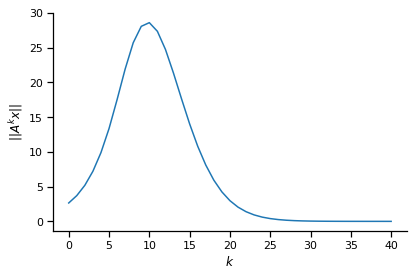

In [85]:
ks = np.arange(41)
norms = [norm(np.linalg.matrix_power(A, k)@x, 2) for k in ks]
print(norms)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ks, norms)
ax.set_xlabel('$k$')
ax.set_ylabel('$\|\|A^k x\|\|$')
fig.tight_layout()
sns.despine(fig)

# Exercise 5 - Types of error

1. The goal of this exercise is to distinguish between the solution error $e$ (aka forward error, or just error) of an approximate solution to a linear system, and the residual error $r$ (aka backward error, or residual). I created vectors and matrices defining four different linear systems with approximate solutions below.

2. For each of the four linear systems and approximate solutions, I computed the residual error as $r = \|Ax - b\|$.
3. For each of the four linear systems and approximate solutions, I computed the solution error as $e= \|y - t\|$.
4. For each case, I displayed the errors and residuals in the table below.

In [127]:
# case 1
A1 = np.array([
    [1, 1],
    [1, 1 - 1e-12]
])
b1 = np.array([0, 0])
x1 = np.array([1,-1])
t1 = np.array([0, 0])

# case 2
A2 = np.array([
    [1, 1],
    [1, 1 - 1e-12]
])
b2 = np.array([1, 1])
x2 = np.array([1.00001, 0])
t2 = np.array([1, 0])

# case 3
A3 = np.array([
    [1, 1],
    [1, 1 - 1e-12]
])
b3 = np.array([1, 1])
x3 = np.array([100, 100])
t3 = np.array([1, 0])

# case 4
A4 = np.array([
    [1e12, -1e12],
    [1, 1]
])
b4 = np.array([0, 2])
x4 = np.array([1.001, 1])
t4 = np.array([1, 1])

cases = [
    (A1, b1, x1, t1),
    (A2, b2, x2, t2),
    (A3, b3, x3, t3),
    (A4, b4, x4, t4)
]

# compute errors and residuals
data = []
for A, b, x, t in cases:
    r = norm(A@x - b)
    e = norm(x - t)
    data.append((r, e))

# create and show the results table
df = pd.DataFrame(
    data,
    columns=['residual', 'error'],
    index=range(1, len(cases)+1)
)
df.index.name = 'k'
df

,residual,error
k,,
1,9.999779e-13,1.414214
2,1.414214e-05,0.000010
3,2.814285e+02,140.716026
4,1.000000e+09,0.001000


Based on the table above, case 1 has a very small residual, but an error of 1.414. In case 2, the error and residual are both on the order of 1e-5. In case 3, the residual is twice as large as the error, but both are in the hundreds. Finally, in case 4, the residual is 1e9 but the error is just 1e-3. These four cases illustrate the range of possiblities for errors and residuals and the relations between them, which depend on the conditioning of the linear system.

# Sine boundary value problem

For this exercise, we will consider the following boundary value problem (BVP):

$$
\begin{align}
    u''  &= -\frac{\pi^2}{100} \sin \left(\frac{\pi x}{10} \right) \\
    u(0) &= 0 \\
    u(5) &= 1
\end{align}
$$

Which has the exact solution:

$$
u = \sin \left( \frac{\pi x}{10} \right)
$$

- I copied the contents of the provided `rope_bvp` function into the cell below, but renamed it `sine_bvp`.
- I simplified the function signature by setting the default `n=11` and removing unused arguments.
- I changed the default values `uleft=0.0` and `uright=1.0` to define the boundary conditions.
- I added arguments for defining the x values of the boundary, with defaults `xleft=0` and `xright=5`.
- I altered the matrix entries to set up finite difference equations for the above BVP.

In [128]:
def sine_bvp(n=11, uleft=0.0, uright=1.0, xleft=0, xright=5):

    # define the x coordinates
    x = np.linspace(xleft, xright, n)
    dx = (xright - xleft) / (n - 1)
    
    # we will set up a linear system Ay = b
    #   to solve for y at each x coordinate
    A = np.zeros([n,n])
    b = np.zeros(n)

    # Equation 0: u0 = uleft
    A[0,0] = 1.0
    b[0] = uleft

    # Equation K: finite difference equations
    for k in range(1, n-1):
        
        # LHS = y"
        #     = d(dy/dx)/dx
        #     = [(dy/dx)_k - (dy/dx)_k-1]/dx
        #     = [(y_k+1 - y_k)/dx - (y_k - y_k-1)/dx]/dx
        #     = [(y_k+1 - y_k) - (y_k - y_k-1)]/dx**2
        #     = [y_k+1 - y_k - y_k + y_k-1]/dx**2
        #     = [y_k+1 - 2*y_k + y_k-1]/dx**2
        A[k,k-1] =  1 / dx**2
        A[k,k]   = -2 / dx**2
        A[k,k+1] =  1 / dx**2
        
        # RHS
        b[k] = -(np.pi**2)/100 * np.sin(np.pi*x[k]/10)

    # Equation N-1: u(n-1) = uright
    A[n-1,n-1] = 1.0
    b[n-1] = uright

    u = np.linalg.solve(A, b)
    return x, u



- I also implemented a function that computes the exact solution to the differential equation.

In [129]:
def u_exact(x):
    return np.sin(np.pi*x/10)

- With the solver and exact function defined, I can now compute and analyze the numerical solution to the BVP. I first computed the numerical solution to the BVP using the predefined boundary conditions and $n=11$ discrete x coordinates. 

In [132]:
# numerically solve sine BVP
xleft = 0
xright = 5
uleft = 0
uright = 1
xn, un = sine_bvp(n=11, uleft=uleft, uright=uright, xleft=xleft, xright=xright)

- I also compute the exact solution to the BVP on a set of 101 discrete x coordinates in the same range as the numerical solution.

In [131]:
# compute exact solution
xe = np.linspace(xleft, xright, 101)
ue = u_exact(xe)

- I plotted the numerical solution and exact solution on the same plot, which can be seen below. The exact solution is shown as a solid blue line while the numerical solution is shown as a dashed red line.

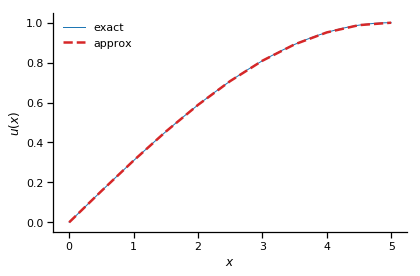

In [134]:
# plot the exat and approximate solutions
colors = sns.color_palette()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xe, ue, label='exact', linestyle='-', color=colors[0], linewidth=1)
ax.plot(xn, un, label='approx', linestyle='--', color=colors[3], linewidth=2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x)$')
ax.legend(frameon=False)
fig.tight_layout()
sns.despine(fig)

In the plot above, it can be seen from the overlap of the two lines that the numerical solution is very similar to the exact solution.

# Exercise 6 - Scaling of error norms

- The objective of this exercise is to gain an understanding that the measured error in a numerical solution depends on the choice of norm that we use, and how we can counteract this through scaling to obtain a more objective error readout.

- To study this, I created a loop that iterates over a series of different numbers of steps $n$.

- For each number of steps, I computed an exact solution and an approximate solution to the sine BVP from the previous exercise. I also computed the error vector between the exact and approximate solution and used this to compute each of the following error norms: $L_1, \frac{L_1}{n}, L_2, \frac{L_2}{\sqrt n}, L_\infty$. I put each of the resulting error norms into a data frame and displayed them in the table below.

In [135]:
data = []
for n in [5, 11, 21, 41, 81, 161, 321, 641]:
    
    # numerical solution
    xn, un = sine_bvp(n)
    
    # exact solution
    xe = np.linspace(xleft, xright, n)
    ue = u_exact(xe)
    
    # compute error norms
    e = ue - un
    e_L1 = norm(e, 1)
    e_L1n = e_L1 / n
    e_L2 = norm(e, 2)
    e_L2n = e_L2 / np.sqrt(n)
    e_Li = norm(e, np.inf)

    data.append((n, e_L1, e_L1n, e_L2, e_L2n, e_Li))

df = pd.DataFrame(data, columns=['$n$', '$L_1$ error', '$L_1/n$ error', '$L_2$ error', '$L_2/{\sqrt n}$ error', '$L_\infty$ error'])
df

,$n$,$L_1$ error,$L_1/n$ error,$L_2$ error,$L_2/{\sqrt n}$ error,$L_\infty$ error
0,5,0.006652,1.330481e-03,0.003901,1.744579e-03,2.682187e-03
1,11,0.002786,2.532401e-04,0.000982,2.961430e-04,4.303047e-04
2,21,0.001402,6.674444e-05,0.000347,7.571111e-05,1.081908e-04
3,41,0.000702,1.711991e-05,0.000123,1.915283e-05,2.704146e-05
4,81,0.000351,4.334514e-06,0.000043,4.817396e-06,6.763330e-06
5,161,0.000176,1.090466e-06,0.000015,1.208066e-06,1.690808e-06
6,321,0.000088,2.734724e-07,0.000005,3.024855e-07,4.227037e-07
7,641,0.000044,6.847520e-08,0.000002,7.568029e-08,1.056766e-07


- From the table above, it can be seen that the error decreases as the number of steps increases, no matter the choice of norm. However, the scale of the norms and the rate at which they decrease is highly dependent on the norm. We can investigate this in depth by calculating an estimate of the error convergence rate for each norm.

In [136]:
# compute the rates of convergence using log2(error_ratio)
error_ratio = (df / df.shift(-1)).mean()[1:]
np.log2(error_ratio).to_frame(name='convergence rate')

,convergence rate
$L_1$ error,1.037769
$L_1/n$ error,2.043268
$L_2$ error,1.581223
$L_2/{\sqrt n}$ error,2.085504
$L_\infty$ error,2.109585


After computing the error ratio between numerical solutions when decreasing the step size, we can estimate the rate of convergence using the log of these ratios. This tells us the exponent by which the error decreases for a given increase in the number of steps. We notice from the table that the $L_1$ norm and $L_2$ norm yield lower estimates of the convergence rate than the other norms. This shows how these norms overestimate the error when the number of steps increases, unless we scale the error by a normalizing factor based on number of steps. After scaling the norms, we see that all three of $\frac{L_1}{n}$, $\frac{L_2}{\sqrt n}$, and $L_\infty$ norms yield an estimated convergence rate around 2. This demonstrates the need to consider the scaling factor when using a norm other than $L_\infty$ to compare errors.

# Exercise 7 - Matrix condition numbers

The purpose of this exercise is to use matrix condition numbers to understand how accurate of a numerical solution we can expect from a given linear system when using floating point operations. Below is a simple proof showing that the condition number of a matrix is bounded from below by 1:

$$
\begin{align}
    A^{-1} A &= I \\
    \|A^{-1} A\| &= \|I\| \\
    \|A^{-1} A\| &= 1 \\
    \|A^{-1}\| \|A\| &\geq 1 \\
    cond(A) &\geq 1 \\
\end{align}
$$

- We will now implement a function that empirically investigates the relation between condition number and numerical accuracy.
- In the function below, a solution vector of ones $t$ is created along with a matrix of linear coefficients $A$ based on the provided `matrix` function and square matrix size `n`.
- The condition number `c` is computed, along with the RHS of the linear equation $At = b$.
- We attempt to compute a numerical solution to the linear system, resulting in an approximate solution $x$. If the matrix is singular, $x$ is set to NaN.
- Finally, the $L_2$ norm of the error $\|t - x\|_2$ is computed and returned, along with the matrix type, matrix size, and condition number.

In [137]:
def exercise7(n, matrix):
    
    # the true solution
    t = np.ones(n)
    
    # the linear coefficients
    A = matrix(n)
    
    # the condition number
    c = np.linalg.cond(A)
    
    # the righthand side
    b = A @ t
    
    try: # the numerical solution
        x = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        x = np.full(n, np.nan)
    
    # the norm of the error
    e = t - x
    enorm = norm(e, 2)
       
    return matrix.__name__, n, c, enorm

- For four different matrix types from the provided gallery and six different matrix sizes, I ran the above function and stored the outputs in a data frame. I displayed the results in a table which can be seen below.

In [138]:
data = []
for matrix in [
    gallery.helmert_matrix,
    gallery.dif2_matrix,
    gallery.moler3_matrix,
    gallery.frank_matrix
]:
    for n in range(5, 35, 5):
        res = exercise7(n, matrix)
        data.append(res)
        
df = pd.DataFrame(data, columns=[
    'matrix type',
    'matrix size',
    'condition number',
    'error norm'
])
df.set_index(['matrix type', 'matrix size'])

condition number    error norm
matrix type    matrix size                                
helmert_matrix 5                1.000000e+00  3.845925e-16
               10               1.000000e+00  1.472877e-15
               15               1.000000e+00  1.241267e-15
               20               1.000000e+00  2.847890e-15
               25               1.000000e+00  4.269670e-15
               30               1.000000e+00  5.047548e-15
dif2_matrix    5                1.392820e+01  1.110223e-16
               10               4.837415e+01  1.110223e-16
               15               1.030869e+02  1.110223e-16
               20               1.780643e+02  1.758924e-15
               25               2.733061e+02  5.641419e-15
               30               3.888121e+02  1.083534e-14
moler3_matrix  5                8.659801e+02  0.000000e+00
               10               3.680592e+06  0.000000e+00
               15               9.078132e+09  0.000000e+00
               20               1.721420e+13  0.000000e+00
               25               2.655155e+16  0.000000e+00
               30               3.043754e+17  0.000000e+00
frank_matrix   5                6.474683e+02  1.007615e-14
               10               2.854322e+07  6.339301e-11
               15               1.371012e+13  5.239743e-05
               20               5.247996e+17  2.790334e+02
               25               1.579279e+18           NaN
               30               3.878795e+18  2.589515e+01

- The condition number for each of the Helmert matrices was 1, which is the lowest possible value. They also had error norms that were on the order of 1e-15, which is close to the machine epsilon. For the `dif2_matrix` type, the condition number was 10 and 400, and increased with the matrix size. There was an associated increase in the size of the error. For the `moler3_matrix` type, the order of the condition number ranged from 1e2 to 1e17, but in all cases the error was zero. The Frank matrix had a similarly a wide range of condition numbers, but the errors grew very rapidly as the condition number increased. For $n=25$, numpy was not able to solve the Frank matrix, and raised a singular matrix error. The condition number for this matrix was greater than 1e18, so errors in the first significant digit should be expected.
- Across all the matrix types and sizes, the order of magnitude of the error norm was directly related to the order of magnitude of the condition number.
- The required number of significant digits depends on the application. For scientific computing applications where you might want 5 or more significant digits, the numerical solution becomes too inaccurate around a condition number of 12.

/home/mtr22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


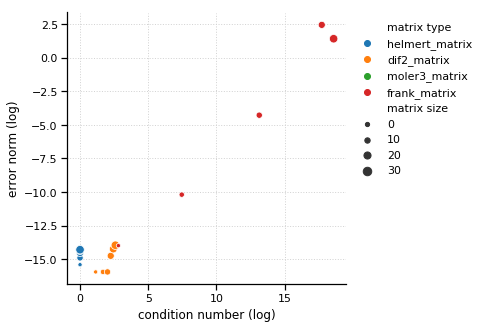

In [140]:
# plot the log of error norm against log of condition number to see trends
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    x=np.log10(df['condition number']),
    y=np.log10(df['error norm']),
    hue=df['matrix type'],
    size=df['matrix size'],
    ax=ax
)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.set_axisbelow(True)
ax.grid(color='lightgray', linestyle=':')
ax.set_ylabel('error norm (log)')
ax.set_xlabel('condition number (log)')
sns.despine(fig)

- The plot above depicts the log of the error norm on the y axis against the log of the condition number on the x axis.The roughly linear relationship between the order of the error norm and the order of the condition number is emphasized by this visualization.

# Exercise 8 - Inverse matrix solution

An alternative method to Gaussian elimination for solving a linear system comes from applying basic linear algebraic operations:

$$
\begin{align}
    Ax &= b \\
    A^{-1} A x &= A^{-1} b \\
    x &= A^{-1} b
\end{align}
$$

The goal of this exercise is to compare the accuracy of numerical solutions generated by this matrix inversion method compared with standard Gaussian elimination, which is implemented by `np.linalg.solve`. We will examine multiplication by the inverse coefficient matrix using `np.linalg.inv`. Then we will contrast the accuracy of each method in terms of the error norms on a set of different matrices.

- I implemented a function that takes a matrix size and matrix type as input, then computes a numerical solution to a linear system defined by that matrix using Gaussian elimination. It uses a random vector as the true solution, and it also estimates an approximate solution using the inverse of the coefficient matrix. The function returns the matrix type, size, condition number, and $L_2$ error norms for the GE and matrix inverse solution methods.

In [141]:
def exercise8(n, matrix):
    
    # the true solution
    t = np.random.rand(n)
    
    # the linear coefficients
    A = matrix(n)
    
    # the condition number
    c = np.linalg.cond(A)
    
    # the righthand side
    b = A @ t
    
    # solve by Gaussian elimination
    try:
        x1 = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        x1 = np.full(n, np.nan)
    
    # solve by matrix inversion
    try:
        Ainv = np.linalg.inv(A)
        x2 = Ainv @ b
    except np.linalg.LinAlgError:
        x2 = np.full(n, np.nan)
    
    # compute error norms
    enorm1 = norm(t - x1, 2)
    enorm2 = norm(t - x2, 2)
    
    return matrix.__name__, n, c, enorm1, enorm2

- I ran another numerical experiment using the above function. This time I used two different matrix types from the gallery and a wider range of matrix sizes. I collected the output error norms into a data frame and displayed them in a table below.

In [142]:
data = []
for matrix in [
    gallery.dif2_matrix,
    gallery.random_matrix
]:
    for n in [10, 50, 100, 500, 1000, 2000]:
        data.append(exercise8(n, matrix))
        
df = pd.DataFrame(data, columns=[
    'matrix type',
    'matrix size',
    'condition number',
    'error norm1',
    'error norm2'
])
df.set_index(['matrix type', 'matrix size'])

condition number   error norm1   error norm2
matrix type   matrix size                                              
dif2_matrix   10               4.837415e+01  3.330669e-16  8.671119e-16
              50               1.053479e+03  2.332500e-14  3.331765e-14
              100              4.133643e+03  3.289740e-14  2.932710e-13
              500              1.017262e+05  6.196951e-13  8.186230e-12
              1000             4.060950e+05  9.884627e-12  8.285822e-11
              2000             1.622760e+06  1.228079e-11  3.193936e-10
random_matrix 10               4.953592e+01  3.038190e-15  2.214888e-15
              50               1.939450e+02  3.096757e-14  5.340473e-14
              100              9.857827e+02  1.230370e-13  4.066674e-13
              500              2.017964e+03  1.000304e-12  5.792863e-12
              1000             1.229420e+04  1.861364e-11  9.199481e-11
              2000             5.629254e+03  1.323307e-11  8.009620e-11

- The order of the condition number tells us approximately how many digits of accuracy we lose when solving a linear system with fixed precision. We can check whether this holds for a few rows of the table above.
- The `dif2_matrix` of size 10 has a condition number of 4.84e1, and it has an error norm of 3.33e-16 when using `solve`. This matches the rule of thumb, since the error values means we lost about one digit of accuracy compared to the maximum of 16 digits of available precision.
- The `random_matrix` of size 50 has a condition number of 1.94e2, meaning we expect a loss of 2 digits of precision. The error for this matrix was on the order of 1e-14 for both solution methods, which again matches the expectation.

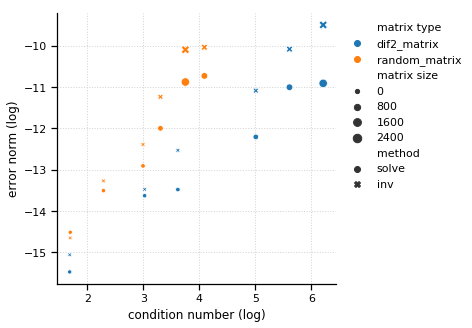

In [144]:
# stack the error norms into one column
plot_df = df.set_index(
    ['matrix type', 'matrix size', 'condition number']
).stack()
plot_df.name = 'error norm'
plot_df = plot_df.reset_index()

# add a column for the solution method
plot_df['method'] = plot_df.level_3.map({
    'error norm1': 'solve',
    'error norm2': 'inv'
}.__getitem__)

# create a scatter plot
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    x=np.log10(plot_df['condition number']),
    y=np.log10(plot_df['error norm']),
    hue=plot_df['matrix type'],
    size=plot_df['matrix size'],
    style=plot_df['method'],
    ax=ax,
)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.set_axisbelow(True)
ax.set_ylabel('error norm (log)')
ax.set_xlabel('condition number (log)')
ax.grid(color='lightgray', linestyle=':')
sns.despine(fig)

- The scatter plot above shows the log-scale relationship between the error norm and the condition number of the coefficient matrix. The size of the points relates to the size of matrix that was solved. One general trend is that larger matrices have larger condition numbers and larger errors.
- The marker style represents the solution method (`solve` or `inv`). Since the condition numbers are the same for a given matrix, regardless of solution method, you can see that each of the errors for solving a given matrix with the two solution methods are vertically aligned in the scatter plot.
- The inversion method resulted in higher error than Gaussian elimination. The difference in error size increases with the size of the matrix. For the largest matrices, the error using the matrix inverse was around an order of magnitude higher than using the standard solver. Therefore, it does not seem worth it to solve large linear systems using the matrix inverse compared with `np.linalg.solve`.

# Exercise 9 - Simulating matrix norms

The purpose of this exercise is to empirically validate the definition of the condition number in terms of matrix norms. The matrix norm is defined as the following:

$$
    \|A\| = \max_{\|x\|>0} \frac{\|Ax\|}{\|x\|}
$$

And similarly for the inverse matrix:

$$
    \|A^{-1}\| = \max_{\|x\|>0} \frac{\|A^{-1}x\|}{\|x\|}
$$

The condition number $cond(A)$ is just the product of these two matrix norms.

- We will test these definition by generating random vectors, performing  matrix-vector multiplications, and checking how the vector norm changes. Then we can compute the norm ratios, as defined above, and take the maximum over repeated samples to create a stochastic approximation of the matrix norm.

- I implemented a function that performs this procedure for computing the norm of a given matrix and its inverse, then estimates the condition number.

In [146]:
def exercise9(n, matrix, tries):
    
    # create matrix and inverse
    A = matrix(n)
    A_inv = np.linalg.inv(A)
    
    # compute exact values
    A_norm_t = norm(A, 2)
    A_inv_norm_t = norm(A_inv, 2)
    A_cond_t = np.linalg.cond(A)

    # estimate matrix norms
    A_norm = A_inv_norm = 0
    for k in range(tries):
        
        x = np.random.normal(size=n)
        x_norm = norm(x, 2)
        A_x = A @ x
        A_x_norm = norm(A_x, 2)
        A_norm = max(A_norm, A_x_norm/x_norm)
        
        # solve Ab = x; b = A^-1 x
        A_inv_x = np.linalg.solve(A, x)
        A_inv_x_norm = norm(A_inv_x, 2)
        A_inv_norm = max(A_inv_norm, A_inv_x_norm/x_norm)
    
    # estimate condition number
    A_cond = A_norm * A_inv_norm
 
    return (
        A_norm_t,     A_norm,
        A_inv_norm_t, A_inv_norm,
        A_cond_t,     A_cond
    )

- To run the experiment, I iterated over 6 different matrix sizes and 5 different numbers of tries in increasing orders of magnitude. For each, I used the function above to estimate the matrix norm, inverse matrix norm, and condition number, as well as computing the true values for comparison. I stored the collected results and displayed them in a table below.

In [147]:
data = []
for n in [2, 4, 8, 16, 32, 64]:
    for tries in [1, 10, 100, 1000, 10000]:
        res = exercise9(n, gallery.dif2_matrix, tries)
        data.append((n, tries) + res)
        
df = pd.DataFrame(data, columns=[
    'matrix size',
    'number of tries',
    '$\|A\|_{true}$',
    '$\|A\|_{pred}$',
    '$\|A^{-1}\|_{true}$',
    '$\|A^{-1}\|_{pred}$',
    '$cond(A)_{true}$',
    '$cond(A)_{pred}$',
])
df.set_index(['matrix size', 'number of tries'])

$\|A\|_{true}$  $\|A\|_{pred}$  \
matrix size number of tries                                   
2           1                      3.000000        2.903978   
            10                     3.000000        2.985463   
            100                    3.000000        2.999828   
            1000                   3.000000        3.000000   
            10000                  3.000000        3.000000   
4           1                      3.618034        2.082599   
            10                     3.618034        3.090319   
            100                    3.618034        3.603906   
            1000                   3.618034        3.580884   
            10000                  3.618034        3.615031   
8           1                      3.879385        2.122664   
            10                     3.879385        3.614618   
            100                    3.879385        3.466058   
            1000                   3.879385        3.675809   
            10000                  3.879385        3.827395   
16          1                      3.965946        2.287543   
            10                     3.965946        3.070062   
            100                    3.965946        3.305017   
            1000                   3.965946        3.414215   
            10000                  3.965946        3.654932   
32          1                      3.990944        2.544112   
            10                     3.990944        3.106473   
            100                    3.990944        3.083256   
            1000                   3.990944        3.219167   
            10000                  3.990944        3.308914   
64          1                      3.997664        2.367709   
            10                     3.997664        2.656561   
            100                    3.997664        2.998357   
            1000                   3.997664        3.113775   
            10000                  3.997664        3.162507   

                             $\|A^{-1}\|_{true}$  $\|A^{-1}\|_{pred}$  \
matrix size number of tries                                             
2           1                           1.000000             0.417255   
            10                          1.000000             0.971802   
            100                         1.000000             1.000000   
            1000                        1.000000             0.999998   
            10000                       1.000000             1.000000   
4           1                           2.618034             1.382788   
            10                          2.618034             2.295057   
            100                         2.618034             2.463434   
            1000                        2.618034             2.609119   
            10000                       2.618034             2.611411   
8           1                           8.290859             1.277441   
            10                          8.290859             6.163377   
            100                         8.290859             7.448670   
            1000                        8.290859             7.925837   
            10000                       8.290859             8.020573   
16          1                          29.365298             3.138690   
            10                         29.365298            13.341144   
            100                        29.365298            20.435179   
            1000                       29.365298            20.624081   
            10000                      29.365298            23.040566   
32          1                         110.422140            18.280735   
            10                        110.422140            44.867764   
            100                       110.422140            43.503944   
            1000                      110.422140            56.889460   
            10000                     110.422140            73.393792   
64          1                         428

- In order to analyze the results of this experiment, I plotted the relative errors of the estimated values compared to the true values on three separate line plots, which can be viewed below. The errors were plotted with respect to the number of triesin the simulation, and I also used the color of the lines to distinguish different matrix sizes.

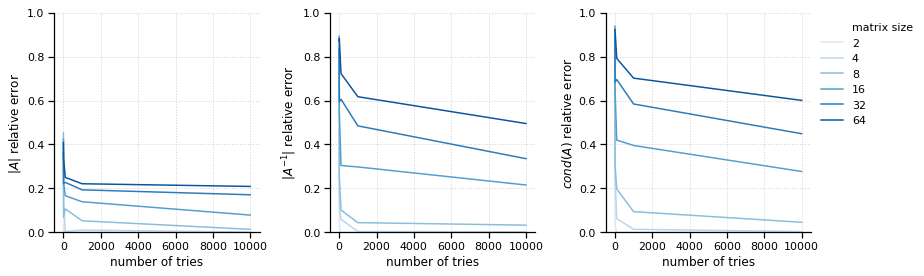

In [154]:
df['$\|A\|$ relative error'] = (df['$\|A\|_{true}$'] - df['$\|A\|_{pred}$']) / df['$\|A\|_{true}$']
df['$\|A^{-1}\|$ relative error'] = (df['$\|A^{-1}\|_{true}$'] - df['$\|A^{-1}\|_{pred}$']) / df['$\|A^{-1}\|_{true}$']
df['$cond(A)$ relative error'] = (df['$cond(A)_{true}$'] - df['$cond(A)_{pred}$']) / df['$cond(A)_{true}$']

# create line plots of relative error vs number of tries
colors = sns.color_palette('Blues')
fig, axes = plt.subplots(1, 3, figsize=(13,4))
sns.lineplot(
    x=(df['number of tries']),
    y=df['$\|A\|$ relative error'],
    hue=df['matrix size'],
    palette=colors,
    ax=axes[0],
    legend=False
)
sns.lineplot(
    x=(df['number of tries']),
    y=df['$\|A^{-1}\|$ relative error'],
    hue=df['matrix size'],
    palette=colors,
    ax=axes[1],
    legend=False
)
sns.lineplot(
    x=(df['number of tries']),
    y=df['$cond(A)$ relative error'],
    hue=df['matrix size'],
    palette=colors,
    ax=axes[2],
)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
for ax in axes:
    ax.set_axisbelow(True)
    ax.grid(color='lightgray', linestyle=':')
    ax.set_ylim(0, 1)

sns.despine(fig)
fig.tight_layout()

- The primary trend in the plots is that the relative error decreases as the number of tries increases, and the error increases as the size of the matrix increases. It should be noted that the error in $\|A\|$ plateaus higher for larger matrices. The relative error in the other two values seems not to have converged for the larger matrices at 10,000 tries, so their error might be reduced with additional samples. However, the largest matrix in this study was not particularly large (64x64), and it has a relative error rate over 50% for the inverse norm and the condition number using 10,000 tries.
- As the size of the matrix increases, the dimensionality of the vectors increases, so it becomes much less likely that random sampling will produce vectors that are aligned in the direction that produces the maximum norm. Therefore, this is not an efficient or reliable method of computing large matrix norms.

# Exercise 10 - Power iteration of matrix norms

In this exercise, we will investigate an improved method for estimating matrix norms. Since the problem in the last exercise was the low probability of sampling random vectors aligned with the direction that produces the maximal matrix norm, we could instead repeatedly multiply a random vector by the matrix, changing its direction over time. After each matrix-vector multiply, we must normalize the vector so that its magnitude stays bounded. This is known as power iteration:

$$
\begin{align}
    x_{i+1} &= \frac{Ax_i}{\|Ax_i\|}
\end{align}
$$

- I created the function `exercise10` below which implements the previously described algorithm, using `exercise9` as a starting point.
- The function creates a matrix of the given size and computes its inverse.
- Then it samples two random vectors $x_1$ and $x_2$ from a multivariate normal distribution.
- Over several iterations, it refines the vectors by setting $x_1 \gets A x_1$ and $x_2 \gets A^{-1} x_2$. 
- The vector norms are then computed and we divide the vectors by their norms, and the loop repeats.

In [168]:
def exercise10(n, matrix, tries):
    
    # create matrix and inverse
    A = matrix(n)
    try: 
        A_inv = np.linalg.inv(A)
    except np.linalg.LinAlgError:
        return (np.nan,) * 6
    
    # compute exact values
    A_norm_t = norm(A, 2)
    A_inv_norm_t = norm(A_inv, 2)
    A_cond_t = np.linalg.cond(A)
    
    # sample two random vectors
    x1 = np.random.normal(size=n)
    x2 = np.random.normal(size=n)

    # apply power iteration
    for k in range(tries):
        
        x1 = A @ x1
        x1_norm = norm(x1, 2)
        x1 /= x1_norm
        
        # solve Ab = x; b = A^-1 x
        x2 = np.linalg.solve(A, x2)
        x2_norm = norm(x2, 2)
        x2 /= x2_norm
        
    # estimate matrix norms
    A_norm = x1_norm
    A_inv_norm = x2_norm
    
    # estimate condition number
    A_cond = A_norm * A_inv_norm
 
    return (
        A_norm_t,     A_norm,
        A_inv_norm_t, A_inv_norm,
        A_cond_t,     A_cond
    )

- I ran an experiment to test the power iteration method for estimating matrix norms and condition numbers. I tried the method using four different types of matrices from the gallery module and six different matrix sizes. I also tested different numbers of tries. For each parameter combination, I called the `exercise10` function and recorded the estimated and true matrix norms and condition numbers in a data frame. The results are shown in a table below.

In [169]:
data = []
for matrix in [
    gallery.helmert_matrix,
    gallery.dif2_matrix,
    gallery.moler3_matrix,
    gallery.frank_matrix
]:
    m = matrix.__name__
    for n in [5, 10, 15, 20, 25, 30]:
        for tries in range(1, 11):
            res = exercise10(n, matrix, tries)
            data.append((m, n, tries) + res)
        
df = pd.DataFrame(data, columns=[
    'matrix type',
    'matrix size',
    'number of tries',
    '$\|A\|_{true}$',
    '$\|A\|_{pred}$',
    '$\|A^{-1}\|_{true}$',
    '$\|A^{-1}\|_{pred}$',
    '$cond(A)_{true}$',
    '$cond(A)_{pred}$',
])
df.set_index(['matrix type', 'matrix size', 'number of tries'])

$\|A\|_{true}$  $\|A\|_{pred}$  \
matrix type    matrix size number of tries                                   
helmert_matrix 5           1                      1.000000        1.785160   
                           2                      1.000000        1.000000   
                           3                      1.000000        1.000000   
                           4                      1.000000        1.000000   
                           5                      1.000000        1.000000   
                           6                      1.000000        1.000000   
                           7                      1.000000        1.000000   
                           8                      1.000000        1.000000   
                           9                      1.000000        1.000000   
                           10                     1.000000        1.000000   
               10          1                      1.000000        3.748004   
                           2                      1.000000        1.000000   
                           3                      1.000000        1.000000   
                           4                      1.000000        1.000000   
                           5                      1.000000        1.000000   
                           6                      1.000000        1.000000   
                           7                      1.000000        1.000000   
                           8                      1.000000        1.000000   
                           9                      1.000000        1.000000   
                           10                     1.000000        1.000000   
               15          1                      1.000000        3.453315   
                           2                      1.000000        1.000000   
                           3                      1.000000        1.000000   
                           4                      1.000000        1.000000   
                           5                      1.000000        1.000000   
                           6                      1.000000        1.000000   
                           7                      1.000000        1.000000   
                           8                      1.000000        1.000000   
                           9                      1.000000        1.000000   
                           10                     1.000000        1.000000   
...                                                    ...             ...   
frank_matrix   20          1                    119.644299       71.632829   
                           2                    119.644299      111.678255   
                           3                    119.644299      103.486369   
                           4                    119.644299       82.553548   
                           5                    119.644299       73.437586   
                           6                    119.644299       74.246867   
                           7                    119.644299       63.735157   
                           8                    119.644299       65.159115   
                           9                    119.644299       54.787599   
                           10                   119.644299       63.461210   
               25          1                           NaN             NaN   
                           2                           NaN             NaN   
                           3                           NaN             NaN   
                           4                           NaN             NaN   
                           5                           NaN             NaN   
                           6                           NaN             NaN   
                           7                           NaN             NaN   
                           8                           NaN             NaN   
                           9                           NaN        

- To analyze the experiment results, I created a grid of line plots showing the effect of number of tries on the relative error. The different plots show the relationship for the different estimates computed by the power iteration method (matrix norm, inverse matrix norm, and condition number) and for each of the four matrix types. In each line plot, the different shades of color reflect different matrix sizes. The plots can be seen below.

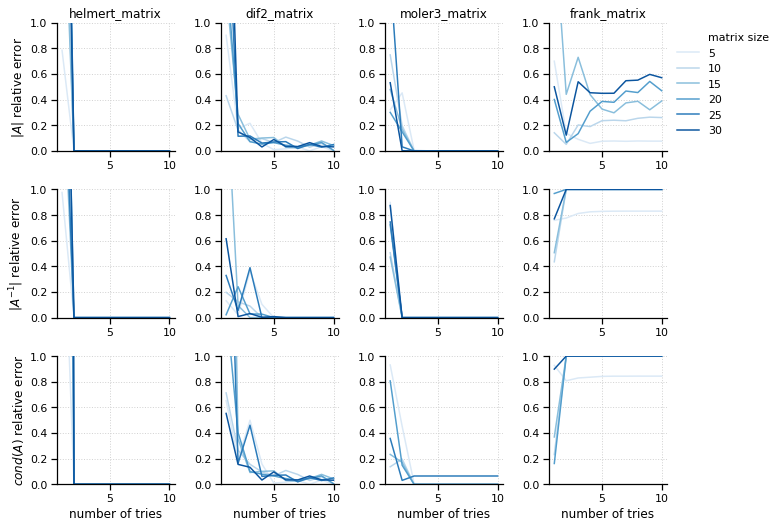

In [170]:
# compute relative errors
df['$\|A\|$ relative error'] = \
    (df['$\|A\|_{true}$'] - df['$\|A\|_{pred}$']).abs() / df['$\|A\|_{true}$']
df['$\|A^{-1}\|$ relative error'] = \
    (df['$\|A^{-1}\|_{true}$'] - df['$\|A^{-1}\|_{pred}$']).abs() / df['$\|A^{-1}\|_{true}$']
df['$cond(A)$ relative error'] = \
    (df['$cond(A)_{true}$'] - df['$cond(A)_{pred}$']).abs() / df['$cond(A)_{true}$']

# create a grid of line plots

matrix_types = df['matrix type'].unique()
error_types = ['$\|A\|$ relative error', '$\|A^{-1}\|$ relative error', '$cond(A)$ relative error']

n_rows = len(error_types)
n_cols = len(matrix_types)

n_hues = df['matrix size'].nunique()
colors = sns.color_palette('Blues', n_hues)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols+1,2.5*n_rows), squeeze=False)

for i in range(n_rows):
    for j in range(n_cols):
        
        ax = axes[i,j]
        error_type = error_types[i]
        matrix_type = matrix_types[j]

        sns.lineplot(
            data=df[df['matrix type'] == matrix_type],
            x='number of tries',
            y=error_type,
            hue='matrix size',
            palette=colors,
            ax=ax
        )
        if i+1 < n_rows:
            ax.set_xlabel('')
        if j > 0:
            ax.set_ylabel('')
        if i == 0 and j+1 == n_cols:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, frameon=False, loc='upper left', bbox_to_anchor=(1,1))
        else:
            ax.legend().set_visible(False)
        if i == 0:
            ax.set_title(matrix_type)

for ax in axes.flatten():
    ax.set_axisbelow(True)
    ax.grid(color='lightgray', linestyle=':')
    ax.set_ylim(0, 1)

sns.despine(fig)
fig.tight_layout()

- From these plot, it is clear that the power iteration method does a much better job at estimating the matrix norms and condition numbers than the previous stochastic method we evaluated. For every matrix type except Frank matrix, and across all the different matrix sizes, the method converges to a relative error below 0.1 in less than 10 tries. I tested out whether the error could be reduced further by inreasing the number of tries beyond 10 and found that it had little effect.
- One possible reason why power iteration performs badly on the Frank matrix is due the condition number, which was greater than 1e16 in every case that I evaluated. This implies that linear solutions of this method will be totally inaccurate when using 16 digits of fixed precision.